In [1]:
import tensorflow as tf

In [2]:
models = tf.keras.models
layers = tf.keras.layers

In [3]:
model = models.Sequential()

# Conv Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(720, 480, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the layers
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(720, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류이므로 sigmoid 사용

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



c:\Users\hungh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
import sixtick.python.easy as s
image_path_arr = ['../image/KEMP_IMG_DATA_1.png', '../image/KEMP_IMG_DATA_Error_2.png', '../image/KEMP_IMG_DATA_Error_12.png']
image_arr_weight = [8,1,1]
path = s.sample(image_path_arr, 1, counts=image_arr_weight)
x_train = []
y_train = []
for i in range(20):
    path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
    isok = not 'Error' in path 
    x_train.append(s.cv.imread(path, s.cv.IMREAD_GRAYSCALE))
    y_train.append(isok)
x_train = s.np.array(x_train)
y_train = s.np.array(y_train)

x_val = []
y_val = []
for i in range(10):
    path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
    isok = not 'Error' in path 
    x_val.append(s.cv.imread(path, s.cv.IMREAD_GRAYSCALE))
    y_val.append(isok)
x_val = s.np.array(x_val)
y_val = s.np.array(y_val)


sixtick
	pytyon
		easy.py
easy.py loaded


In [7]:
import sixtick.python.easy as s
def get_train_data_kemp() :
    image_path_arr = ['../image/KEMP_IMG_DATA_1.png', '../image/KEMP_IMG_DATA_Error_2.png', '../image/KEMP_IMG_DATA_Error_12.png']
    image_arr_weight = [8,1,1]
    path = s.sample(image_path_arr, 1, counts=image_arr_weight)[0]
    x_train = s.cv.imread(path, s.cv.IMREAD_GRAYSCALE)
    y_train = not 'Error' in path
    return x_train.reshape(-1, 720, 480), s.np.array([y_train]) #s.np.array([int(y_train)])


sixtick
	pytyon
		easy.py
easy.py loaded


In [30]:
x, y =  get_train_data_kemp()
x.reshape(-1, 720,480).shape
y.shape

(1,)

In [31]:
# 모델 학습
x_train, y_train = get_train_data_kemp()
x_val, y_val = get_train_data_kemp()
history = model.fit(
    x_train,  # 입력 데이터 (훈련 데이터)
    y_train,  # 출력 데이터 (훈련 데이터의 레이블)
    # steps_per_epoch=100,
    epochs=1,
    validation_data=(x_val, y_val)  # 검증 데이터와 검증 레이블
    # validation_steps=50
    # ,verbose=1
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 3.2648 - val_accuracy: 0.0000e+00 - val_loss: 1959.6205


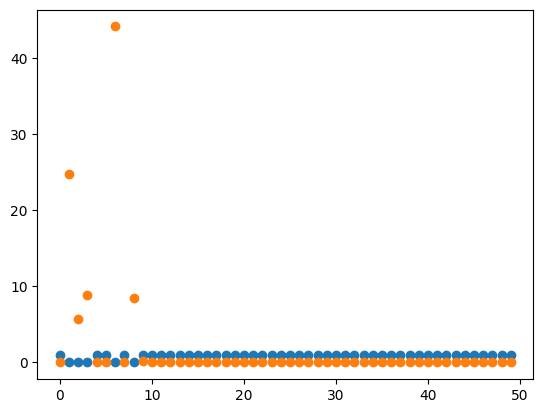

100


In [8]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame()
for i in range(100):
    x_train, y_train = get_train_data_kemp()
    x_val, y_val = get_train_data_kemp()
    # print(len(history))
    if len(history_df) == 50:
        history_df.drop(0, inplace=True)
        history_df.reset_index(drop=True, inplace=True)
    history = model.fit(
        x_train,  # 입력 데이터 (훈련 데이터)
        y_train,  # 출력 데이터 (훈련 데이터의 레이블)
        # steps_per_epoch=100,
        epochs=1,
        validation_data=(x_val, y_val)  # 검증 데이터와 검증 레이블
        # validation_steps=50
        ,verbose=0
    )
    if len(history_df) == 0 :
        history_df = pd.DataFrame(history.history)
    else :
        history_df = pd.concat([history_df,pd.DataFrame(history.history)], axis=0)
        history_df.reset_index(drop=True, inplace=True)
    
    plt.scatter(range(len(history_df)), history_df['val_accuracy'])
    plt.scatter(range(len(history_df)), history_df['val_loss'])
    plt.show()
    print(i+1)
    clear_output(wait=True)



In [94]:

history_df.drop(0, inplace=True)
history_df.reset_index(drop=True, inplace=True)
# history_df.drop('index',axis=1, inplace=True)
len(history_df)
print(history_df)

    accuracy          loss  val_accuracy      val_loss
0        0.0  3.693059e+04           1.0  0.000000e+00
1        1.0  0.000000e+00           1.0  0.000000e+00
2        0.0  7.696396e+03           1.0  0.000000e+00
3        1.0  0.000000e+00           0.0  1.456090e+03
4        0.0  1.456090e+03           0.0  1.165945e+03
..       ...           ...           ...           ...
90       1.0  1.367628e-26           1.0  1.345126e-26
91       1.0  0.000000e+00           1.0  1.325076e-26
92       1.0  0.000000e+00           1.0  1.307023e-26
93       1.0  0.000000e+00           1.0  1.290923e-26
94       1.0  1.290923e-26           1.0  1.276531e-26

[95 rows x 4 columns]


In [58]:
import pandas as pd

# 예시 DataFrame 두 개
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df2 = pd.DataFrame({
    'A': [7, 8, 9],
    'B': [10, 11, 12]
})

# 1. 수직으로 결합 (행 추가)
df_vertical = pd.concat([df1, df2], axis=0)
print(df_vertical)

# 2. 수평으로 결합 (열 추가)
df_horizontal = pd.concat([df1, df2], axis=1)
print(df_horizontal)


   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12
   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12
